**KrisGreenDrive Insights Analysis of Exploring Washington's Electric Vehicle Landscape for a client**


Client Company: The client company is a leading automotive equipment manufacturer and seller with a strategic focus on electric vehicles (EVs). They have invested heavily in EV technology and aim to establish themselves as a prominent equipment player in the electric car market starting from in Washington State region.


Data Available: The client company has requested to provide the insights using the Electric Vehicle Population Data form gov data.

https://catalog.data.gov/dataset/electric-vehicle-population-data


This dataset includes information such as

1'Location

2'Model Year'

3'Make'

4'Model'

5'Electric Vehicle Type'

6'Price Range Category'

7'Electric Utility'

Which helps in giving insights and recommendations for client question.

Analyzing the dataset of registered Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs)
from the Washington State Department of Licensing helps businesses understand the current state of electric vehicle
adoption in the region. This data provides insights into consumer preferences and market trends, aiding stakeholders in making informed decisions regarding product development, marketing strategies, and infrastructure investments to
better serve the growing market for electric vehicles in Washington State.

## Electric Vehicle Population data set##


##### **Business Objectives and Statements from the client**

With growing awareness of the environmental repercussions of transportation, electric vehicles have surfaced as a promising avenue to curb carbon emissions and advocate sustainability. Nonetheless, their uptake remains restricted by factors such as steep costs, range constraints, and inadequate charging infrastructure.

To foster broader acceptance of electric vehicles, it is imperative to grasp the present landscape of the electric car market and pinpoint opportunities for enhancement.


Market Understanding: The client aims to gain a deeper understanding of the electric car market dynamics, including factors driving adoption and barriers in widespread acceptance.

Competitive Analysis: Client seek insights into the competitive landscape, including the market share of key players, emerging trends, and areas where they can differentiate their offerings.

Strategy Development: Based on data-driven insights, the client intends to develop strategic initiatives to enhance their market position, address customer needs, and overcome challenges in the electric vehicle ecosystem.

Product Innovation: Leveraging data analytics, the client aims to identify opportunities for product innovation and optimization, such as enhancing vehicle features, improving charging infrastructure, or designing targeted marketing campaigns to attract potential EV buyers.And promote diversity in market for customers

##### **Importing Packages**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
#import warnings
#warnings.filterwarnings("ignore")


This code prepares Python for data analysis by importing libraries for

numerical work (NumPy),
data manipulation (Pandas),
visualizations (Matplotlib & Seaborn),
and text processing (re).

These tools help in  efficiently clean, analyze, and visualize data to extract valuable insights.  
  
Temporarily silencing warnings with warnings.filterwarnings("ignore") is used in the intial stage during analysis development.

This code reads data from a CSV file named 'EVD.csv' which is dowloaded from the gov website on 10th March 2024 and stores it in a Pandas DataFrame named 'df'. DataFrames are like tables with rows and columns, making data easy to organize. The head() method then peeks at the first five rows of 'df' and displays them. This gives you a quick preview of the data's format and contents.

In [ ]:
df = pd.read_csv('EVD.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXKT0C59G,Yakima,Zillah,WA,98953.0,2016,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,15.0,206822717,POINT (-120.26317 46.40556),PACIFICORP,5.307700e+10
1,5YJ3E1EA2J,Snohomish,Edmonds,WA,98020.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,21.0,137721636,POINT (-122.37507 47.80807),PUGET SOUND ENERGY INC,5.306105e+10
2,1G1RE6E4XE,Kitsap,Port Orchard,WA,98367.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0,26.0,197718468,POINT (-122.6847073 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
3,2C4RC1L76M,Skagit,Bow,WA,98232.0,2021,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32.0,0.0,40.0,256274308,POINT (-122.440636 48.5613885),PUGET SOUND ENERGY INC,5.305795e+10
4,5YJ3E1EA2J,Thurston,Olympia,WA,98513.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,2.0,259176578,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10


#### **Variable Description**

In Pandas, df.info is a quick way to check the health of data. It gives the summary of the DataFrame's structure, including data types, missing values, and memory usage, helping to identify potential issues and optimize analysis.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173533 entries, 0 to 173532
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         173533 non-null  object 
 1   County                                             173528 non-null  object 
 2   City                                               173528 non-null  object 
 3   State                                              173533 non-null  object 
 4   Postal Code                                        173528 non-null  float64
 5   Model Year                                         173533 non-null  int64  
 6   Make                                               173533 non-null  object 
 7   Model                                              173533 non-null  object 
 8   Electric Vehicle Type                              173533 non-null  object

From just looking at the dataset we can see that our dataset comprises various categorical and numeric columns, providing diverse information about electric vehicles.

**Categorical columns** include VIN (1-10), County, City, State, Make, Model, Electric Vehicle Type, Clean Alternative Fuel Vehicle (CAFV) Eligibility, Vehicle Location, and Electric Utility give us qualitative details

**Numeric columns** including Postal Code, Model Year, Electric Range, Base MSRP, Legislative District, DOL Vehicle ID, and 2020 Census Tract, offer quantitative details

##### **Missing Values** several columns contain missing values, with County, City, Postal Code, Electric Range, Base MSRP, Legislative District, Vehicle Location, Electric Utility, and 2020 Census Tract exhibiting varying degrees of missing data.

Given the overall size of the dataset, dropping these rows will likely have a minimal impact on the accuracy and representativeness of our analysis. Furthermore, dropping these rows with missing values is a simple and straightforward approach that allows us to work with a clean dataset without having to make assumptions

this code helps you identify which columns inDataFrame have missing values and how many missing values each column contains.This information is crucial for data cleaning, as we may need to decide how to handle these missing values before proceeding with analysis for client.

In [ ]:
missing_values_count = df.isnull().sum()

# Filter columns with missing values
columns_with_missing_values = missing_values_count[missing_values_count > 0]

# Print columns with missing values
print("Columns with missing values:")
print(columns_with_missing_values)

Columns with missing values:
County                    5
City                      5
Postal Code               5
Electric Range            1
Base MSRP                 1
Legislative District    376
Vehicle Location         10
Electric Utility          5
2020 Census Tract         5
dtype: int64


The below code removes rows in the DataFrame that contain missing values, leaving only rows with complete data.As mentioned in Feature Engineering

In [ ]:
# Dropping the missing values
df = df.dropna()

#### **Feature Engineering**



**Feature Engineering:** Extracting Latitude and Longitude
In our dataset, the Vehicle Location column contains both latitude and longitude coordinates as a string.

 To make these coordinates more accessible for further analysis, we will perform the following feature engineering steps:

1. Convert the Vehicle Location column to string type.
2. Create two new columns in the DataFrame, latitude and longitude.
3. Extract latitude and longitude values from the Vehicle Location column and store them in the respective new columns.

To achieve this, we define a function called extract_coordinates(), which takes two arguments: the input string (containing the coordinates) and the index (0 for latitude and 1 for longitude). The function uses regular expressions to find and return the floating-point numbers representing the coordinates. We then use the apply() function to apply this custom function to each element of the Vehicle Location column and populate the new latitude and longitude columns.

Finally, we drop any rows with missing values in the latitude and longitude columns to ensure a clean dataset for further analysis.

In [ ]:
# Convert the 'Vehicle Location' column to string type
df['Vehicle Location'] = df['Vehicle Location'].astype(str)

# Extract the latitude and longitude from the 'Vehicle Location' column
def extract_coordinates(x, index):
    coords = re.findall(r'-?\d+\.\d+', x)
    if len(coords) >= 2:
        return float(coords[index])
    else:
        return None

df['latitude'] = df['Vehicle Location'].apply(lambda x: extract_coordinates(x, 0))
df['longitude'] = df['Vehicle Location'].apply(lambda x: extract_coordinates(x, 1))

df = df.dropna(subset=['latitude', 'longitude'])

**Feature Engineering:** Creating a 'Location' Column
In our dataset, we have three columns representing different levels of geographical divisions: County, City, and State. To create a more informative and combined representation of these geographical attributes, we will create a new column called Location.

The Location column will be a concatenation of the County, City, and State columns, with each value separated by a comma. For example, if a row has the values "Yakima" for County, "Yakima" for City, and "WA" for State, the corresponding Location value will be "Yakima, Yakima, WA".

In [ ]:
df['Location'] = df['County'] + ', ' + df['City'] + ', ' + df['State']

**Feature Engineering:** Creating a Price_Range_Category Column
In our dataset, we have observed an unusual distribution of values in the Base MSRP column, with a large number of vehicles having a value of 0. This could potentially indicate missing or unknown values in the dataset. To account for this uncertainty and still make use of the available data, we have decided to create a new column called Price_Range_Category based on the Base MSRP values.

We have defined four categories for the Price_Range_Category column:

- "Unknown": If the Base MSRP value is 0, we assign this category as it might indicate missing or unknown values.
- "Low": If the Base MSRP value is less than 40,000, we assign this category.
- "Medium": If the Base MSRP value is between 40,000 and 60,000, we assign this category.
- "High": If the Base MSRP value is greater than 60,000, we assign this category.

In [ ]:
df['Base MSRP'].value_counts()

0.0         169789
69900.0       1393
31950.0        379
52900.0        221
32250.0        136
54950.0        131
59900.0        128
39995.0        111
36900.0        102
44100.0         93
64950.0         85
45600.0         83
33950.0         74
52650.0         69
34995.0         64
36800.0         57
55700.0         51
53400.0         34
81100.0         22
98950.0         20
90700.0         19
110950.0        19
75095.0         13
102000.0        12
43700.0         11
184400.0        10
89100.0          9
109000.0         7
91250.0          5
32995.0          3
845000.0         1
Name: Base MSRP, dtype: int64

In [ ]:
def create_price_range_category(df, column='Base MSRP'):
    def categorize_price(price):
        if price == 0:
            return "Unknown"
        elif price < 40000:
            return "Low"
        elif price < 60000:
            return "Medium"
        else:
            return "High"

    df['Price_Range_Category'] = df[column].apply(categorize_price)
    return df

df = create_price_range_category(df, column='Base MSRP')

**Feature Engineering:** Creating an 'Electric_Range_Category' Column
In our dataset, we have observed an unusual distribution of values in the 'Electric Range' column, with a large number of vehicles having a value of 0. This could potentially indicate missing or unknown values in the dataset. To account for this uncertainty and still make use of the available data, we have decided to create a new column called 'Electric_Range_Category' based on the 'Electric Range' values.

We have defined four categories for the 'Electric_Range_Category' column:

- "Unknown": If the 'Electric Range' value is 0, we assign this category as it might indicate missing or unknown values.
- "Short": If the 'Electric Range' value is less than 150, we assign this category.
- "Medium": If the 'Electric Range' value is between 150 and 300, we assign this category.
- "Long": If the 'Electric Range' value is greater than 300, we assign this category.

In [ ]:
def create_electric_range_category(df, column='Electric Range'):
    def categorize_range(electric_range):
        if electric_range == 0:
            return "Unknown"
        elif electric_range < 150:
            return "Short"
        elif electric_range < 300:
            return "Medium"
        else:
            return "Long"

    df['Electric_Range_Category'] = df[column].apply(categorize_range)
    return df

df = create_electric_range_category(df, column='Electric Range')

In [ ]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,...,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,latitude,longitude,Location,Price_Range_Category,Electric_Range_Category
0,5UXKT0C59G,Yakima,Zillah,WA,98953.0,2016,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,15.0,206822717,POINT (-120.26317 46.40556),PACIFICORP,5.307700e+10,-120.263170,46.405560,"Yakima, Zillah, WA",Unknown,Short
1,5YJ3E1EA2J,Snohomish,Edmonds,WA,98020.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,21.0,137721636,POINT (-122.37507 47.80807),PUGET SOUND ENERGY INC,5.306105e+10,-122.375070,47.808070,"Snohomish, Edmonds, WA",Unknown,Medium
2,1G1RE6E4XE,Kitsap,Port Orchard,WA,98367.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,...,26.0,197718468,POINT (-122.6847073 47.50524),PUGET SOUND ENERGY INC,5.303509e+10,-122.684707,47.505240,"Kitsap, Port Orchard, WA",Unknown,Short
3,2C4RC1L76M,Skagit,Bow,WA,98232.0,2021,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,...,40.0,256274308,POINT (-122.440636 48.5613885),PUGET SOUND ENERGY INC,5.305795e+10,-122.440636,48.561388,"Skagit, Bow, WA",Unknown,Short
4,5YJ3E1EA2J,Thurston,Olympia,WA,98513.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,2.0,259176578,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10,-122.817545,46.988760,"Thurston, Olympia, WA",Unknown,Medium


#### **Exploratory Data Analysis**

EDA is done mainly to gain insights and understand the dataset, EDA helps us to identify patterns, relationships, and anomalies.

EDA is a preprocessing step, before model training it is helpful, in arriving at decisions and also helps in future analysis for the client.

For our electric car dataset as per client need the following columns:

- 'Location'
- 'Model Year'
- 'Make'
- 'Model'
- 'Electric Vehicle Type'
- 'Price Range Category'
- 'Electric Utility'

To answers clients question and give insights and recommendation




**1. Location**

provided insights and recommdation

Why are electric cars found in urban areas like Seattle and Bellevue?

How can efforts be expanded to promote electric vehicle adoption beyond King and Clark counties in Washington state?


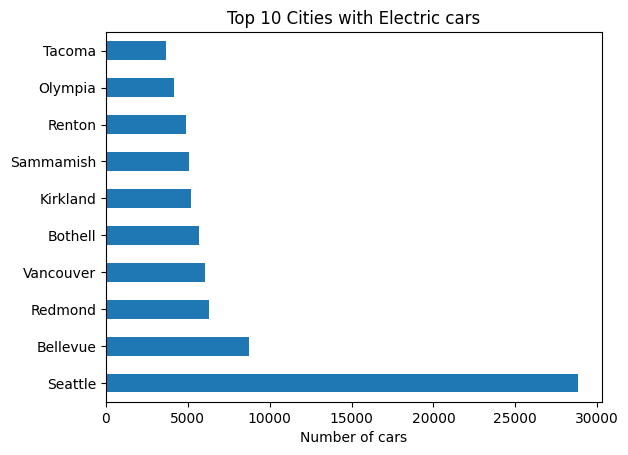

In [ ]:
city_cars=df['City'].value_counts().head(10)
city_cars.plot(kind='barh', title="Top 10 Cities with Electric cars",\
               xlabel='Number of cars')
plt.show()

The top 10 cities in Washington with electric cars includes Seattle, Bellevue, Redmond and Vancouver.

This makes to conclusion that cities are faster to adopt electric vehicles than suburbs.

In [ ]:
def plot_value_counts(df, column, top_n=None):
    # Get the value counts for the specified column
    value_counts = df[column].value_counts()

    if top_n:
        value_counts = value_counts.head(top_n)

    # Set up the subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 7))

    # Create the pie chart
    value_counts.plot(kind='pie', ax=axes[0], autopct='%.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    axes[0].set_ylabel('')
    axes[0].set_title(f'Percentage of {column}', fontsize=14)

    # Create the bar chart
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1], palette='pastel')
    axes[1].set_title(f'Count of {column}', fontsize=14)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Count')
    axes[1].tick_params(axis='x', rotation=30)

    for i, v in enumerate(value_counts.values):
        axes[1].text(i, v + 0.5, str(v), horizontalalignment='center', fontsize=12)

    # Set the suptitle for the entire figure
    fig.suptitle(f'{column} Distribution', fontsize=18, y=1.03)

    # Show the plots
    plt.show()

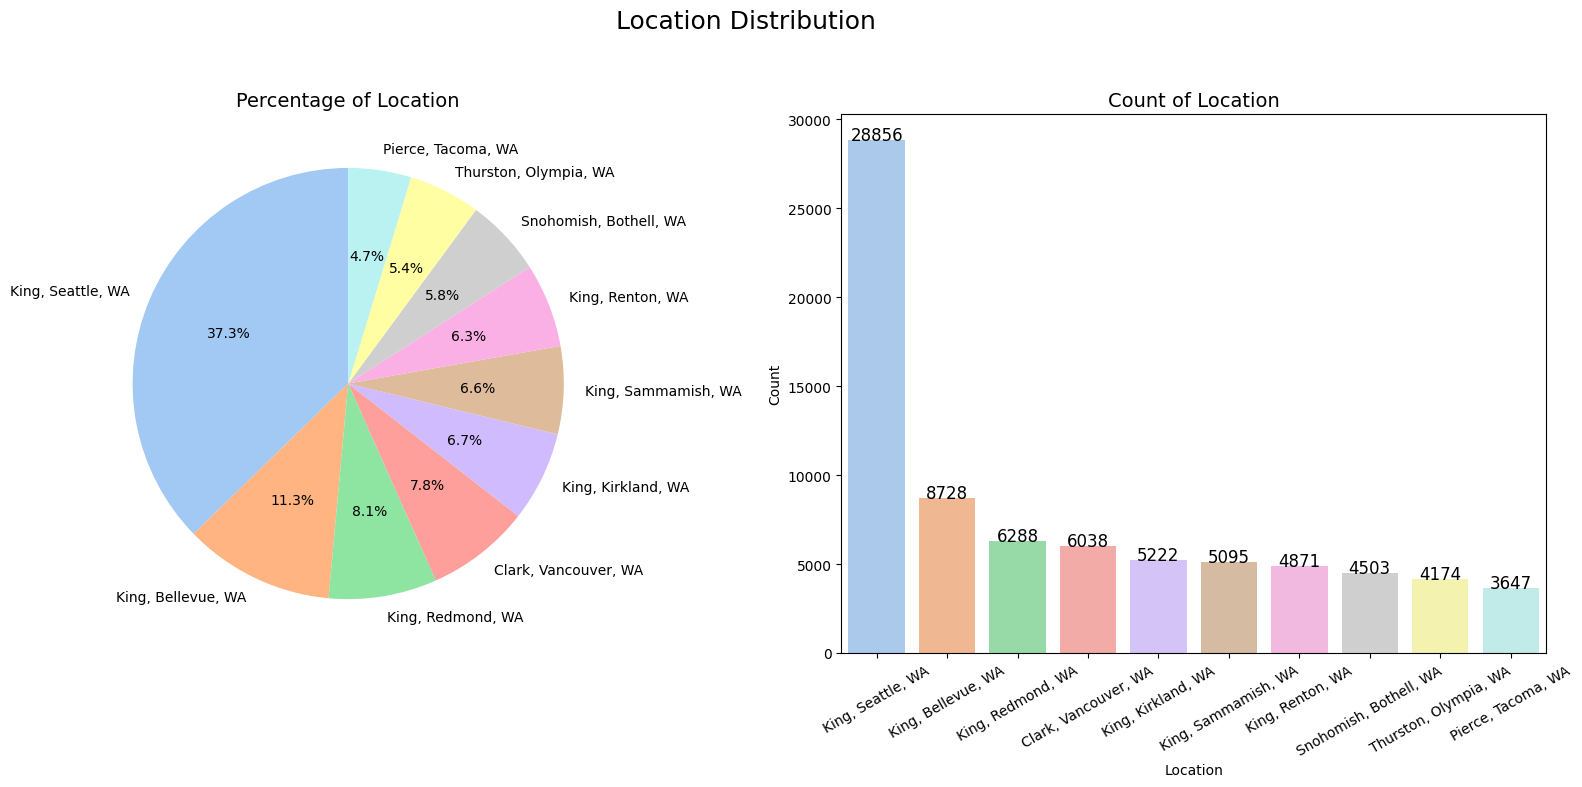

In [ ]:
plot_value_counts(df, 'Location', top_n=10)

##### **Insights and Recommendations**

1. The dataset's top 10 electric car counts predominantly belong to Washington state (WA), without representation from other states.
2. King County emerges as the area with the highest number of electric vehicles, notably Seattle, recording 28,856 cars.
3. This concentration suggests a predominance of electric cars in urban regions, particularly major cities like Seattle and Bellevue.
4. Following closely is Clark County, with Vancouver tallying 6038 electric cars.

Based on the above insights we can recommend the following

1. Focus on urban areas: Given the concentration of electric cars in urban settings, prioritize advocacy efforts in cities, especially major ones like Seattle and Bellevue.
2. Expand to other counties: While King and Clark counties lead in electric car numbers, explore opportunities to promote electric vehicles in other Washington counties.
3. Target specific cities: Identify cities or neighborhoods within high-electric-car counties with lower adoption rates for tailored advocacy campaigns and outreach initiatives.

**2. Make**

1. How might advocating for a more diverse range of electric car makes benefit the overall electric vehicle market?
2. What strategies could be implemented to increase the availability and accessibility of less common electric car makes like Volvo and Audi, as recommended in the insights?

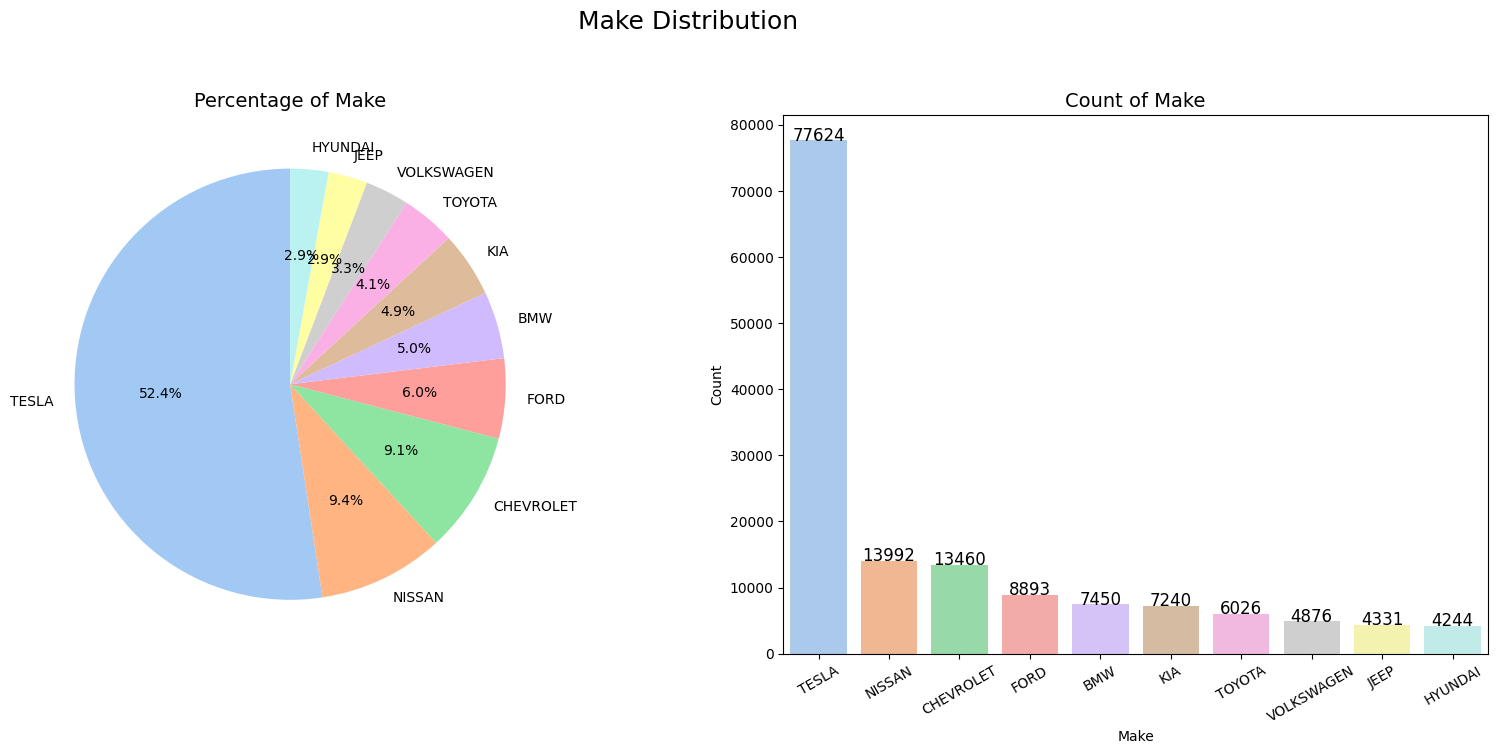

In [ ]:
plot_value_counts(df, 'Make', top_n=10)

##### **Insights and Recommendations**

1. Tesla is the predominant make among the electric cars in the dataset, comprising 77,624 vehicles.
2. Following Tesla, Nissan and Chevrolet are the next most prevalent makes, with 13,992 and 13,460 cars respectively.
3. The remaining makes exhibit lower counts, with Hyundai registering the smallest count of 4244 cars.

Based on the above insights we can recommend the following

1. Advocate for a diverse range of electric car makes, recognizing that while Tesla leads, there are significant numbers of other makes.
2. Push for increased availability of less common makes like Volvo and Audi to enhance consumer choice and promote diversity within the electric car market.
3. Focus on promoting Tesla electric cars, considering their dominance in the dataset, to drive higher adoption rates and encourage more people to choose Tesla vehicles.



**3. Model**


Why does the recommendation suggest focusing on promoting the Tesla Model Y and Model 3?


How could increasing the availability of less common electric car models benefit consumers?

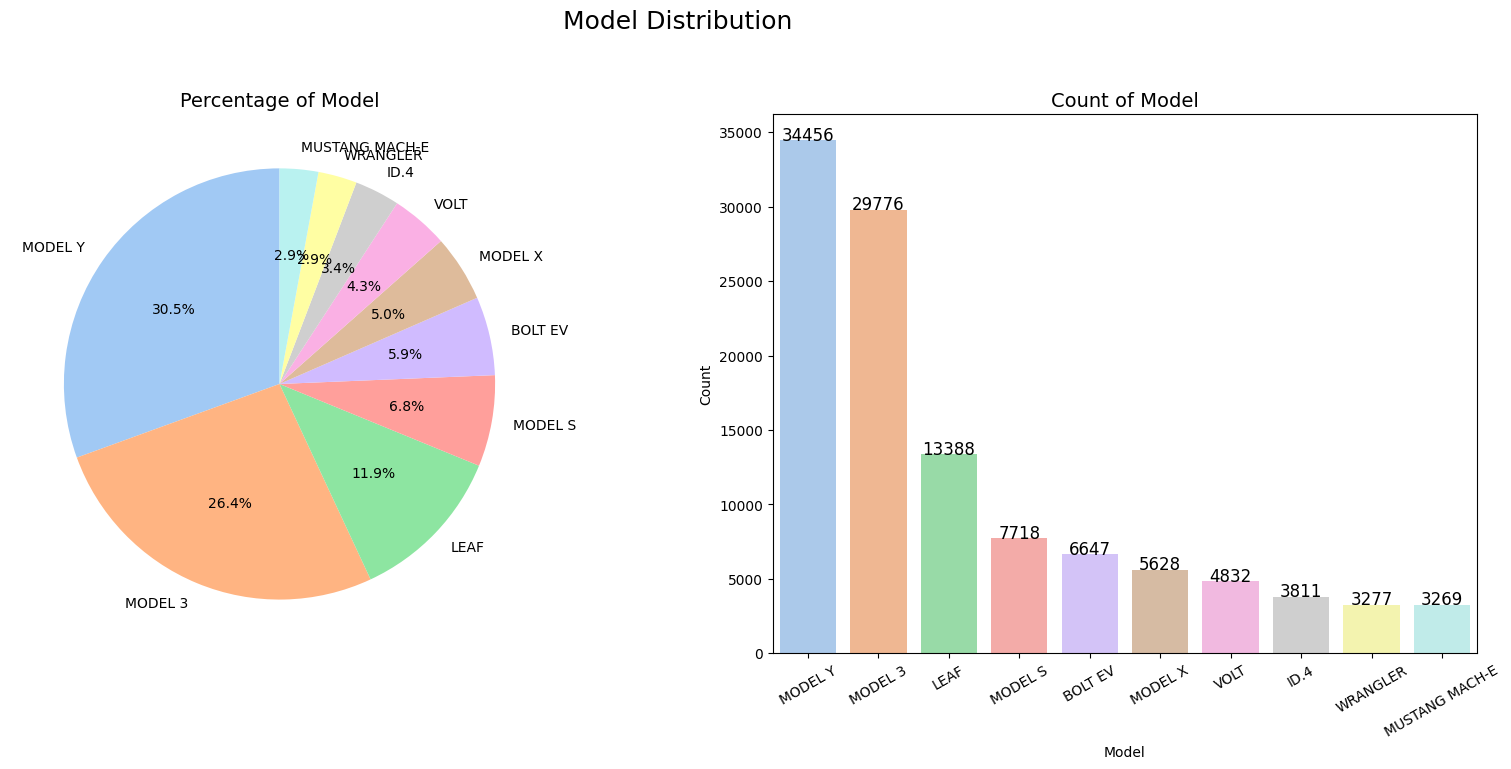

In [ ]:
plot_value_counts(df, 'Model', top_n=10)

#### **Insights and Recommendations**

1. The most common model of electric car in the dataset is the Tesla Model Y, with 34,456 cars falling into this category.
2. The next most common model is the Tesla Model 3, with 29,776 cars.
3. The Nissan Leaf is the third most common model, with 13,388 cars.
4. The remaining models have relatively smaller counts, with the Mustang Mach-E having the lowest count of 3,269 cars.

Based on the insights we can recommend the following

1. Focus on promoting the Tesla Model Y and Model 3, which are the most common models in our dataset, this helps in higher adoption rates and encourage more people to purchase.
2. Advocate for a diverse range of electric car models, there are other models with significant numbers. Promote the unique benefits of each model to appeal to a wider audience and diversify the electric car market.
3. Have increased availability of less common models like the Mustang Mach-E and Kia Niro to enhance consumer choice and promote diversity within the electric car market.

**4. EV Type**


Why is it important for electric car advocacies to highlight both battery electric vehicles (BEVs) and plug-in hybrid electric vehicles (PHEVs), according to the insights provided?


How might educating consumers about the differences between BEVs and PHEVs contribute to promoting well-informed purchasing decisions?

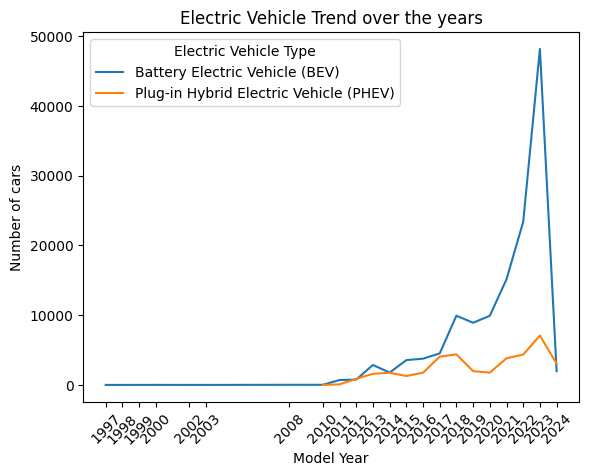

In [ ]:
year_cars= df.groupby(['Model Year','Electric Vehicle Type']).size().unstack()
year_cars.plot(kind='line', xticks=year_cars.index, rot=45,xlabel="Model Year", ylabel="Number of cars",
title='Electric Vehicle Trend over the years')
plt.show()

From year 1997 to 2010, there was demand for Battery Electric Vehicle but since 2010, the year in which Plug-in Hybrid Electric Vehicle was introduced, there has been demand for both the vehicle types.

In years 2012, 2014 and 2017 we see equal number of cars of both the vehicle types. However, we see increase in the demand of battery electric vehicles since 2017 and a significant increase from 2021 to 2022.

This could be attributed to people's preference of moving away from internal combustion engines and increased environmental awareness.

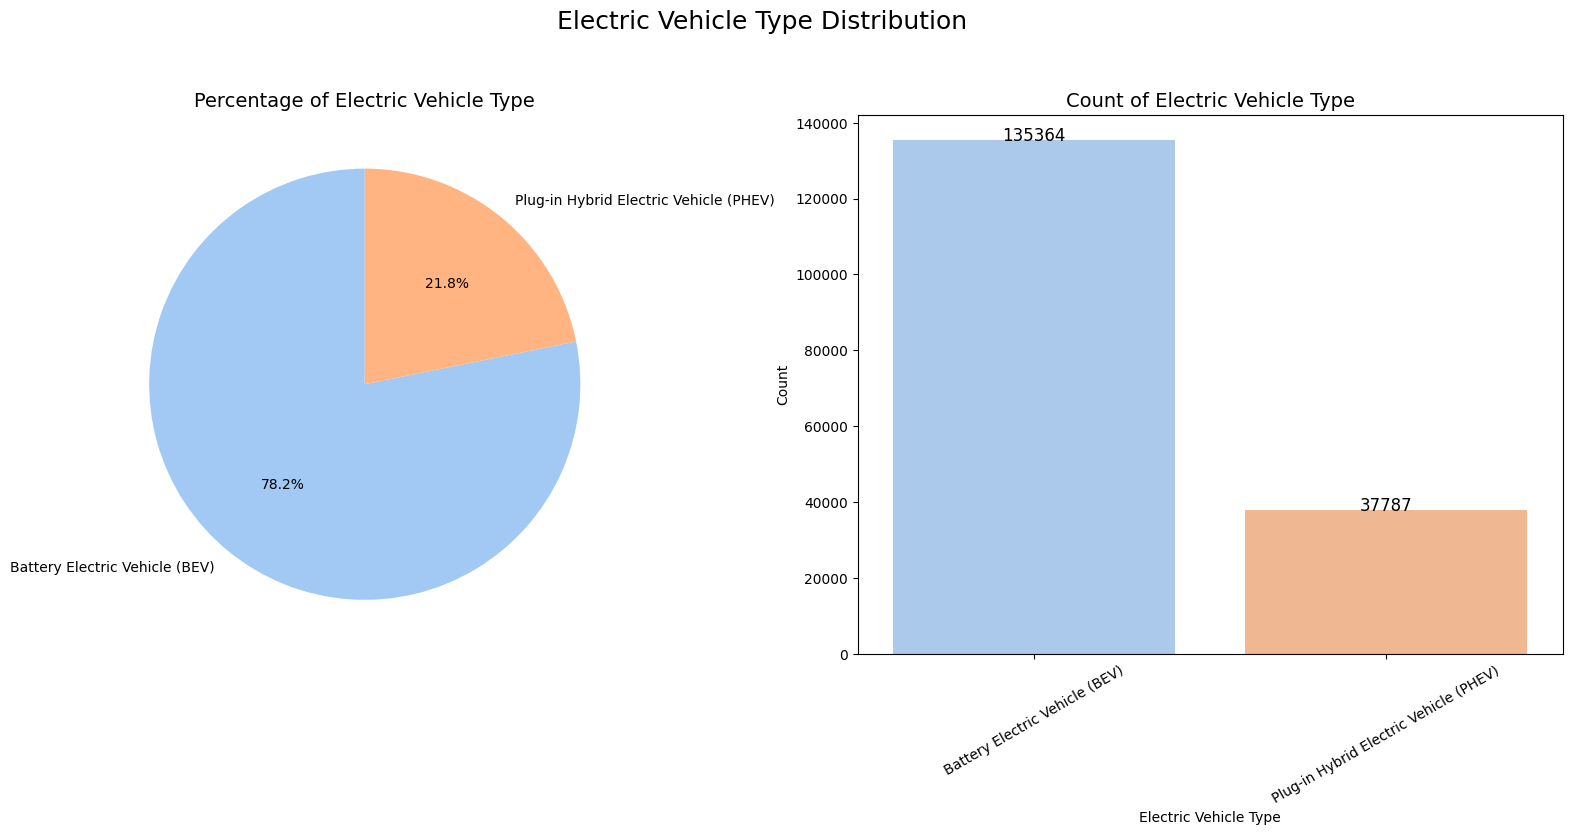

In [ ]:
plot_value_counts(df, 'Electric Vehicle Type', top_n=2)

#### **Insights and Recommendations**

1. Battery electric vehicles (BEVs) dominate the dataset, comprising 135,364 cars, making them the most prevalent type of electric vehicle.
2. Following BEVs are plug-in hybrid electric vehicles (PHEVs), with  cars, representing the second most common type.
3. The dataset does not include any other types of electric vehicles, highlighting the prevalence of BEVs and PHEVs as the primary choices among electric car owners.

Based on the insights we can recommend the following

1. Given their prevalence in the dataset, electric car advocacies should emphasize the benefits of both BEVs and PHEVs to attract more buyers to these types of vehicles.

2. Clarify that BEVs and PHEVs serve different purposes and possess unique attributes. Educate consumers about these variances to assist them in making well-informed purchasing decisions.

3. Sure BEVs and PHEVs dominate the market, but other electric vehicle categories, such as fuel cell electric vehicles (FCEVs), are absent from the dataset. We should push for an expanded selection of electric vehicle types to broaden consumer options and help bring in diversity.

In [ ]:
df=pd.read_csv('EVD.csv')
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXKT0C59G,Yakima,Zillah,WA,98953.0,2016,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,15.0,206822717,POINT (-120.26317 46.40556),PACIFICORP,5.307700e+10
1,5YJ3E1EA2J,Snohomish,Edmonds,WA,98020.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,21.0,137721636,POINT (-122.37507 47.80807),PUGET SOUND ENERGY INC,5.306105e+10
2,1G1RE6E4XE,Kitsap,Port Orchard,WA,98367.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0,26.0,197718468,POINT (-122.6847073 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
3,2C4RC1L76M,Skagit,Bow,WA,98232.0,2021,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32.0,0.0,40.0,256274308,POINT (-122.440636 48.5613885),PUGET SOUND ENERGY INC,5.305795e+10
4,5YJ3E1EA2J,Thurston,Olympia,WA,98513.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,2.0,259176578,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173528,5YJ3E1EA0P,King,Redmond,WA,98052.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,48.0,227238091,POINT (-122.12302 47.67668),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
173529,5YJXCBE22H,Snohomish,Snohomish,WA,98296.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200.0,0.0,1.0,113289473,POINT (-122.15134 47.8851158),PUGET SOUND ENERGY INC,5.306105e+10
173530,1C4RJXR65R,King,Kent,WA,98031.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,33.0,257440403,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
173531,5UXKT0C50G,King,Seattle,WA,98199.0,2016,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,36.0,114351471,POINT (-122.394185 47.639195),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


**5. Price Range**

How might greater transparency in pricing information for electric cars, particularly regarding the 'Base MSRP' values, benefit consumers in making informed purchasing decisions?


Considering the low number of electric cars falling into the 'Low' and 'Medium' price range categories, what strategies could be implemented to make electric vehicles more affordable and accessible to a wider consumer base?

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_value_counts1(df, column, top_n=None):
    # Get the value counts for the specified column
    value_counts = df[column].value_counts()

    if top_n:
        value_counts = value_counts.head(top_n)

    # Set up the subplot
    fig, ax = plt.subplots(figsize=(16, 6))

    # Create the bar chart
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette='pastel')
    ax.set_title(f'Count of {column}', fontsize=14)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=30)

    for i, v in enumerate(value_counts.values):
        ax.text(i, v + 0.5, str(v), horizontalalignment='center', fontsize=12)

    # Set the suptitle for the entire figure
    fig.suptitle(f'{column} Distribution', fontsize=18, y=1.03)

    # Show the plot
    plt.show()

In [ ]:
import plotly.express as px

fig = px.pie(df, values=df['Price_Range_Category'].value_counts(), names=df['Price_Range_Category'].unique())
fig.show()

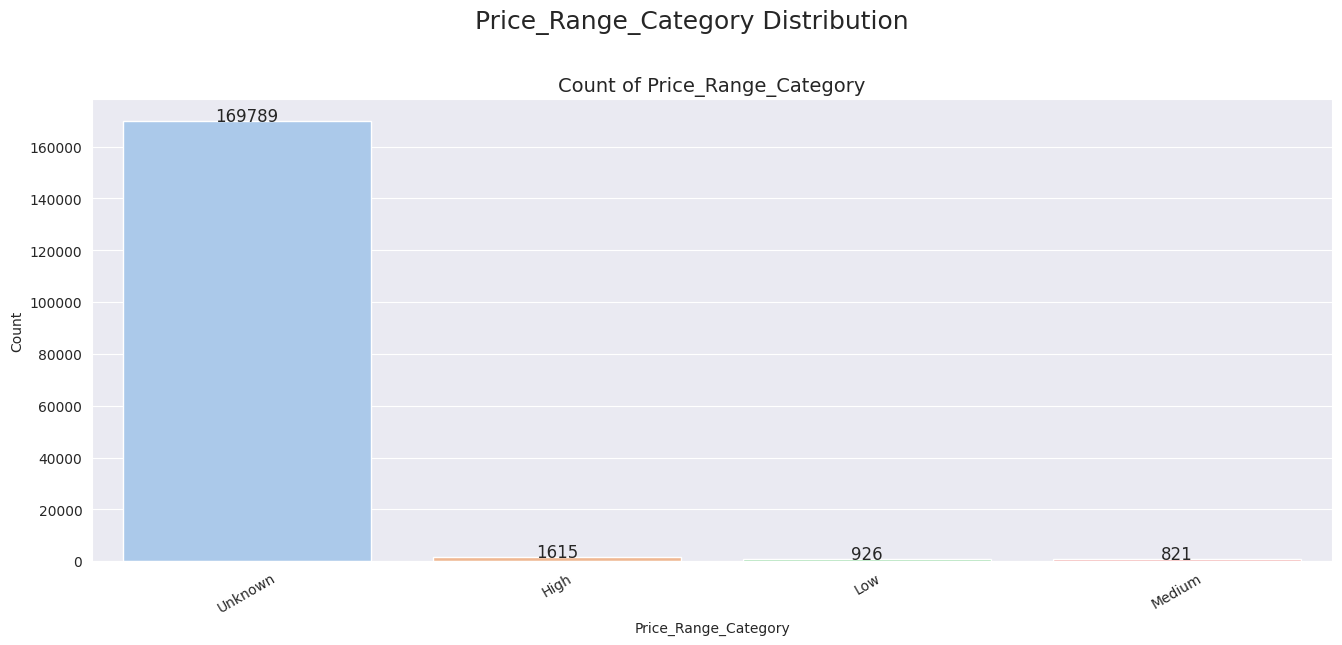

In [ ]:
plot_value_counts1(df, 'Price_Range_Category', top_n=4)

#### **Insights and Recommendations**

1. The dataset indicates that the majority of electric cars are categorized as having an unknown price range, comprising 169,789 cars. This prevalence is likely attributed to a significant number of vehicles having a value of 0 in the 'Base MSRP' column.
2. Conversely, only a small fraction of electric cars are classified under defined price range categories. Specifically, there are 1,615 cars categorized as 'High', 926 cars categorized as 'Low', and 821 cars categorized as 'Medium'.
3. These price range categories are determined based on the 'Base MSRP' values, wherein a value of 0 denotes an unknown price range.

Based on the insights we can recommend the following

1. Majority of electric cars in the dataset are lacking a defined price range category, there should be greater transparency in pricing. Clear pricing information helps customers in making informed purchase decisions.

2. Very less number of cars are falling into the 'Low' and 'Medium' price range categories, from this we can infer that electric cars are not cheap. Focus on more afforadable electric vehicles to a wider consumer base.

3. Electric cars compared to traditional gasoline-powered vehicles are much costly, There can be incentives and subsidies put in place to help consumers and thereby boost their adoption rates.

**6. Electric Utility**

How might collaboration with dominant electric utility companies like Puget Sound Energy Inc. contribute to the establishment of reliable electric grids essential for widespread electric car adoption?


What strategies could be implemented to encourage electric utility companies to promote renewable energy sources like wind and solar power for powering electric cars, as recommended in the insights?

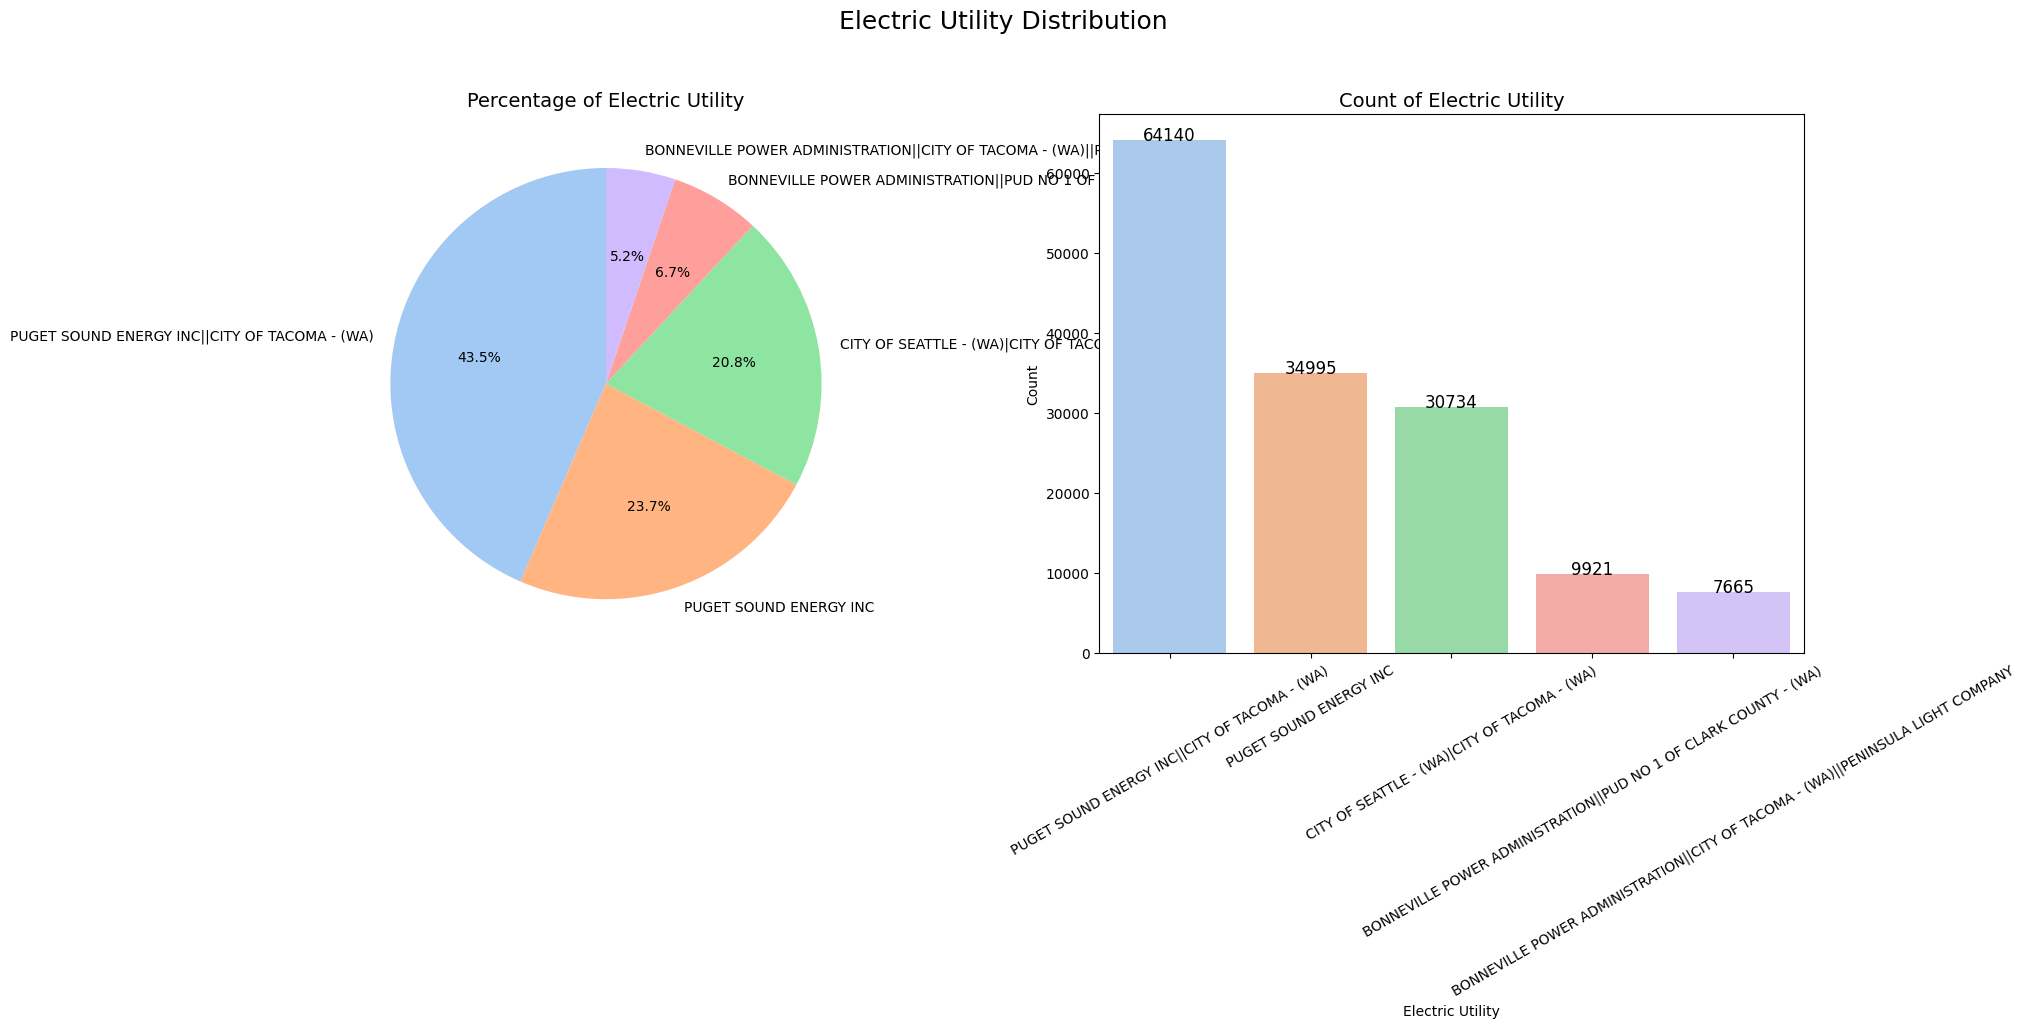

In [ ]:
plot_value_counts(df, 'Electric Utility', top_n=5)

#### **Inference and Recommendations**

1. Puget Sound Energy Inc. emerges as the most dominant electric utility company in the dataset, powering 64,140 electric cars.
2. Following closely is PUGET SOUND ENERGY INC, accounting for 34,995 cars, succeeded by CITY OF SEATTLE with 30,734 cars.
3. While other electric utility companies are present in the dataset, their contribution to powering electric cars is notably lower compared to the aforementioned entities.

Based on the insights we can recommend the following

1. Collaborate with electric utility companies to establish reliable and efficient electric grids necessary for widespread electric car adoption.
2. Promote renewable energy sources like wind and solar power by electric utility companies to power electric cars, ensuring sustainability and environmental friendliness.
3. More charging stations in public areas such as parking lots and rest areas to facilitate convenient charging for electric car owners.

**7. Car Trends over time**

How has the trend in electric vehicle registration numbers evolved over the years, and what implications does this trend have for the advancement of electric vehicle technology and market competition?




Considering Tesla's dominance in electric car registrations, how might competition from other established manufacturers like Chevrolet, Nissan, and BMW, as well as emerging brands, contribute to offering diverse options for consumers in terms of features, price points, and vehicle types?


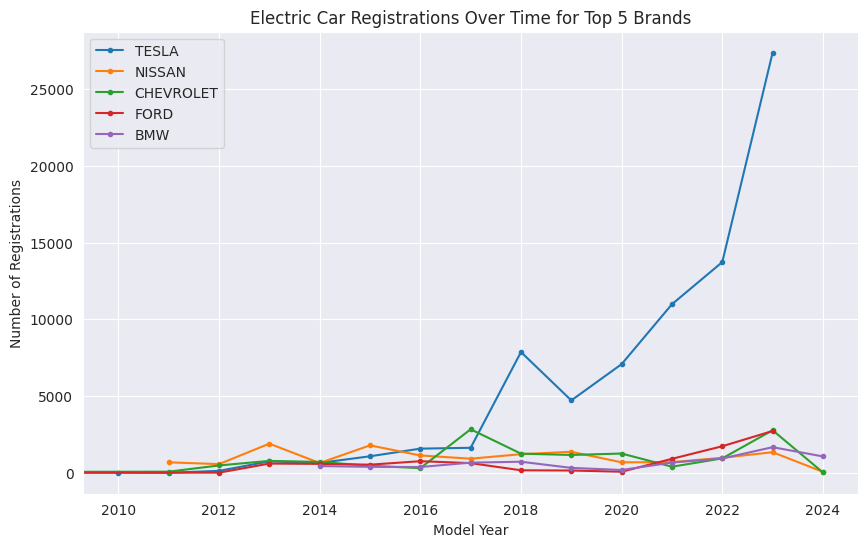

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
import matplotlib.animation as animation

# Group by Make and Model Year and count the registrations
year_register = df.groupby(['Make', 'Model Year']).size().reset_index(name='Count')

# Get top 5 brands with the highest car registration
top_brands = year_register.groupby('Make')['Count'].sum().nlargest(5).index

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Electric Car Registrations Over Time for Top 5 Brands')
ax.set_xlabel('Model Year')
ax.set_ylabel('Number of Registrations')
ax.grid(True)

lines = []

# Iterate through each top brand and plot initial data
for make in top_brands:
    make_register = year_register[(year_register['Make'] == make) & (year_register['Model Year'] >= 2010)]
    line, = ax.plot(make_register['Model Year'], make_register['Count'], marker='.', label=make)
    lines.append(line)

ax.legend()

def animate(i):
    for j, make in enumerate(top_brands):
        make_register = year_register[(year_register['Make'] == make) & (year_register['Model Year'] <= (2010 + i))]
        if not make_register.empty:
            lines[j].set_data(make_register['Model Year'], make_register['Count'])
        else:
            lines[j].set_data([], [])
    return lines

ani = animation.FuncAnimation(fig, animate, frames=range(0, 15), interval=1000, blit=True)

HTML(ani.to_html5_video())

#### **Inference and Recommendations**

1. The number of electric vehicles registered has increased significantly over time. In 2017, there were only a few thousand electric vehicles registered, while in 2023, there were over 25,000.
2. Tesla is the most popular brand of electric car, with over 25,000 electric vehicles registered in 2023.
3. Other popular brands of electric cars include Chevrolet, Nissan, and BMW.

Based on the insights we can recommend the following

1. A diverse electric car market with established and new players competing can lead to faster advancements in technology also helps in competition.
2. While Tesla is currently the leader, other established manufacturers like Chevrolet, Nissan, and BMW, alongside emerging brands, offer various options in terms of features, price points, and vehicle types.

**8. Model Year**

How do the insights regarding overall growth, brand performance, and market potential reflect the electric vehicle market and what implications do these trends have for the future?


What are the limitations associated with the dataset provided, particularly regarding the timeframe of the information and potential in monthly vehicle counts for counties and how might these limitations affect the interpretation of the insights presented in this Data analysis?

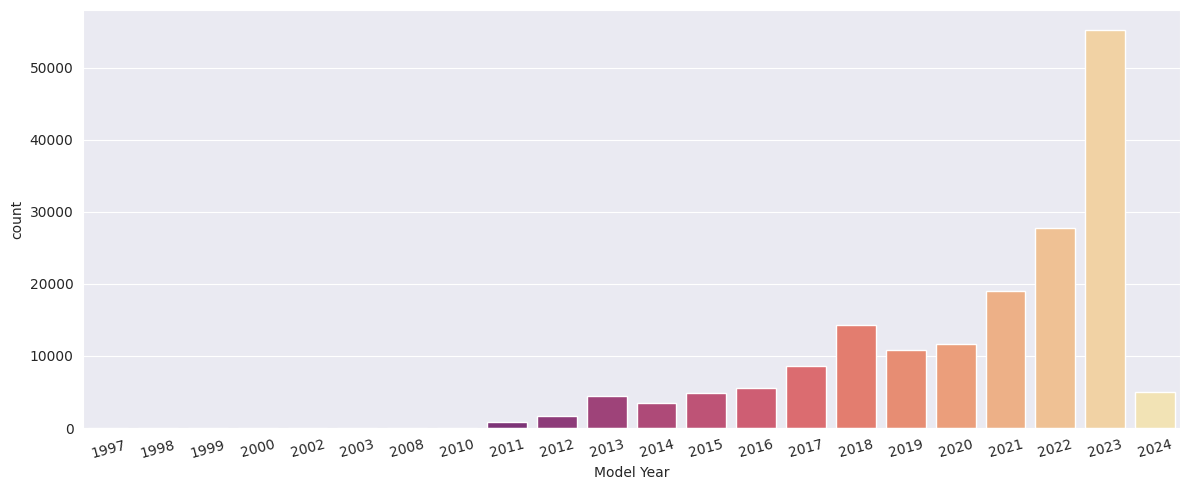

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Model Year', palette='magma')
plt.xticks(rotation=15, ha='center')
plt.tight_layout()
plt.show()

#### **Insights and Limitations**

**Overall growth:**
There has been a significant increase in the number of electric vehicles registered over the years. This indicates a growing trend towards electric mobility.

**Brand performance:** Tesla is the leading brand, with a substantial number of registered vehicles compared to others.
Other brands like Chevrolet, Nissan, and BMW are also showing a presence in the market.

**Market potential:** The steady rise in registrations suggests potential for continued growth in the electric vehicle market.

**Limitations:** The dataset likely reflects information up to a specific year and may not capture the latest trends.

Monthly count of vehicles for a county may change from this report and prior reports. Processes were implemented to more accurately assign county at the time of registration.

**Note:** A Battery Electric Vehicle (BEV) is an all-electric vehicle using one or more batteries to store the electrical energy that powers the motor and is charged by plugging the vehicle in to an electric power source. A Plug-in Hybrid Electric Vehicle (PHEV) is a vehicle that uses one or more batteries to power an electric motor; uses another fuel, such as gasoline or diesel, to power an internal combustion engine or other propulsion source; and is charged by plugging the vehicle in to an electric power source.

**Questions to ask on for future analysis:**
1. Total electric vehicle registrations across all brands in the country.
2. Reasons behind brand choices by consumers.
3. Regional variations in electric vehicle adoption.
4. Government policies and incentives for electric vehicles.
5. Development of charging infrastructure.
6. Technological advancements in battery range and efficiency.
7. Consumer preferences and changing attitudes towards electric vehicles.
8. Change in selleing price in differnt states.

By considering these insights and limitations we gain a better understanding of the current state and potential future of the electric vehicle market.